In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Demo 1. Noiseless sparse signal

### 1. Generate a k-spars signal

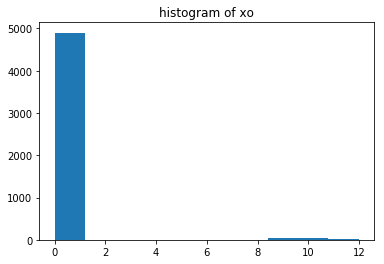

In [58]:
# generage a k-sparse signal

N=5000   # length of the signal
k=100    # no. of non-zero values
x0=np.zeros((N,1))

# slelect k indices for non-zero values
pick=np.random.permutation(N)
pick=pick[:k]

# set non-zero values from N(10,1)
x0[pick]= 10 + np.random.randn(k,1)

#plt.plot(x0)
#plt.title('k-sparse signal')
plt.hist(x0)
plt.title('histogram of xo')

### 2. Measure using a random matrix

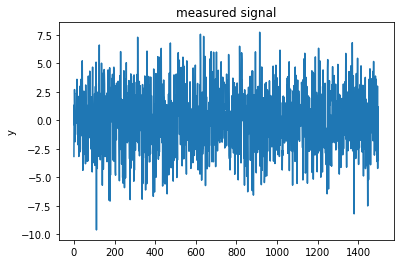

In [59]:
# measurement


# random matrix for measurement
n = 1500        # no. of measurement
A = np.random.randn(n,N) / np.sqrt(n)
y = np.dot(A,x0)


plt.plot(y)
plt.ylabel('y')
plt.title('measured signal')


### 3. Recover the sparse signal using AMP

In [60]:
# soft thresholding functions that we are going to use

def Afunc(v):
    global A
    return np.dot(A,v)

AT = A.T
def ATfunc(v):
    global AT
    return np.dot(AT,v)

def Eta(vv,tt):
    """
    Soft thresholding function
    """
    v_new=(np.abs(vv) > tt)*(np.abs(vv) - tt)*np.sign(vv)
    return v_new


def EtaDer(vv,tt):
    """
    Derivative function of Soft thresholding
    """
    v_der=abs(vv) > tt
    #return float(v_der)         # works for scalar only
    #return v_der.astype(float)  # works for array only
    # solution found in https://stackoverflow.com/questions/17506163/how-to-convert-a-boolean-array-to-an-int-array
    return 1*v_der 


# test
print(Eta(4,1))
print(Eta(0.5,1))
print(Eta(-4,1))


# test
print(EtaDer(4,1))
print(EtaDer(0.5,1))
print(EtaDer(-4,1))

3
-0.0
-3
1
0
1


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[2.72512079e-06]


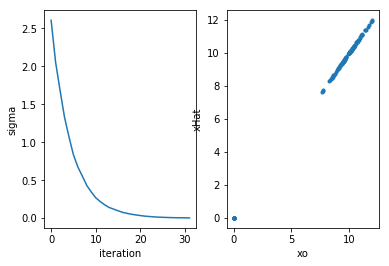

In [61]:
# AMP is implemented in AMP.py 
from AMP import AMP

%load_ext autoreload
%autoreload 2

xHat, empiricalSigma = AMP(y,Afunc,ATfunc,Eta,EtaDer,100)

MSE = sum((xHat-x0)**2)/len(x0)
print(MSE)

plt.subplot(121)
plt.plot(empiricalSigma)
plt.xlabel('iteration')
plt.ylabel('sigma')
plt.subplot(122)
plt.plot(x0,xHat, '.')
plt.xlabel('xo')
plt.ylabel('xHat')

In [68]:
# state evolution!
# SE for normal signal is in SEnorm.py
from SEnorm import SEnorm

%load_ext autoreload
%autoreload 2

niter = len(empiricalSigma)-1

import time
t = time.time()
# start
sigmaSE = SEnorm(k, N, n, eta, [10, 1], 0, niter)
# end
elapsed = time.time() - t
print('elapsed time='+str(elapsed))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
sigma=2.594866727470475
itr = 0
    sigma=2.0512889934906107
itr = 1
    sigma=1.6223522848753902
itr = 2
    sigma=1.2831487479814583
itr = 3
    sigma=1.014867032882018
itr = 4
    sigma=0.8026778668103723
itr = 5
    sigma=0.6348533719228812
itr = 6
    sigma=0.5021177492328784
itr = 7
    sigma=0.39713459082850744
itr = 8
    sigma=0.31410139050747393
itr = 9
    sigma=0.24842883444855063
itr = 10
    sigma=0.19648714603191436
itr = 11
    sigma=0.15540546507600161
itr = 12
    sigma=0.12291317301522207
itr = 13
    sigma=0.09721439392935778
itr = 14
    sigma=0.07688873499247906
itr = 15
    sigma=0.060812780183999375
itr = 16
    sigma=0.04809799815366994
itr = 17
    sigma=0.038041632357439285
itr = 18
    sigma=0.030087859120344056
itr = 19
    sigma=0.02379706680153579
itr = 20
    sigma=0.0188215580939542
itr = 21
    sigma=0.014886332506456698
itr = 22
    sigma=0.01177388685814391
itr = 

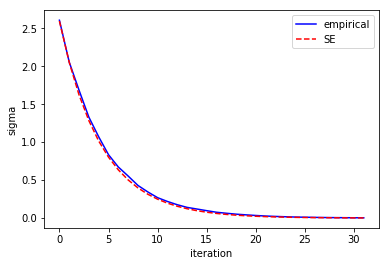

In [67]:
# plot result
plt.plot(empiricalSigma,'b-');
plt.plot(sigmaSE,'r--');
plt.xlabel('iteration');
plt.ylabel('sigma');
plt.legend(['empirical','SE']);

## Demo 2. with measurement noise

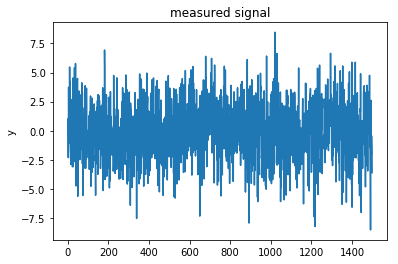

In [39]:
# random matrix for measurement
n = 1500        # no. of measurement
A = np.random.randn(n,N) / np.sqrt(n)
y = np.dot(A,x0)

# add Gaussian noise
sigma_noise=0.1
y = y + np.random.randn(n,1)*sigma_noise

plt.plot(y)
plt.ylabel('y')
plt.title('measured signal')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0.00534743]


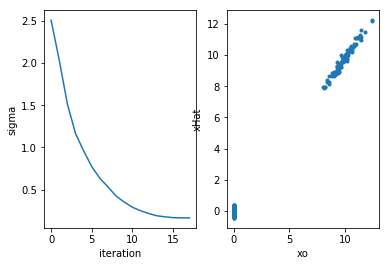

In [40]:
# run AMP
from AMP import AMP

%load_ext autoreload
%autoreload 2

# soft thresholding functions are defined by lambda functions
fnA = lambda v: np.dot(A,v)
AT = A.T
fnAT = lambda v: np.dot(AT,v)

eta = lambda vv, tt: (np.abs(vv) > tt)*(np.abs(vv) - tt)*np.sign(vv)
etaDer = lambda vv, tt: 1*(abs(vv) > tt)

# call AMP here
xHat, empiricalSigma = AMP(y,fnA,fnAT,eta,etaDer,100)

MSE = sum((xHat-x0)**2)/len(x0)
print(MSE)

plt.subplot(121)
plt.plot(empiricalSigma)
plt.xlabel('iteration')
plt.ylabel('sigma')
plt.subplot(122)
plt.plot(x0,xHat, '.')
plt.xlabel('xo')
plt.ylabel('xHat')


## state evolution!

In [56]:
from SEnorm import SEnorm

%load_ext autoreload
%autoreload 2

niter = len(empiricalSigma)-1

import time
t = time.time()
# start
sigmaSE = SEnorm(k, N, n, eta, [10, 1], sigma_noise, niter)
# end
elapsed = time.time() - t
print('elapsed time='+str(elapsed))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
sigma=2.5967928938083094
itr = 0
    sigma=2.0552383543003327
itr = 1
    sigma=1.628547525711545
itr = 2
    sigma=1.291924622919651
itr = 3
    sigma=1.0266896664687366
itr = 4
    sigma=0.8181628639531139
itr = 5
    sigma=0.6547819377761865
itr = 6
    sigma=0.5274460321631534
itr = 7
    sigma=0.4289854159852491
itr = 8
    sigma=0.353722516151508
itr = 9
    sigma=0.2971009661660534
itr = 10
    sigma=0.25537609516172843
itr = 11
    sigma=0.22538117732416643
itr = 12
    sigma=0.2043918424324265
itr = 13
    sigma=0.19008716005642762
itr = 14
    sigma=0.1805635510211325
itr = 15
    sigma=0.1743417197057719
itr = 16
    sigma=0.17033412197154527
elapsed time=11.707125186920166


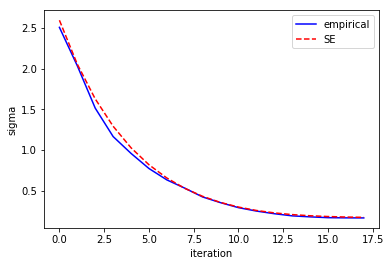

In [55]:
# plot result
plt.plot(empiricalSigma,'b-');
plt.plot(sigmaSE,'r--');
plt.xlabel('iteration');
plt.ylabel('sigma');
plt.legend(['empirical','SE']);